In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv(r"C:\Users\Monster\Desktop\UberDataSet\UberDataset.csv")

In [3]:
df.head(24)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [ ]:
#Cleaning Null values

In [7]:
df.loc[df['PURPOSE'].isna(),'PURPOSE'] = df.loc[df['PURPOSE'].isna(),'PURPOSE'].fillna('UnKnown')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#fixing date Dtypes

In [11]:
df.loc[df['START_DATE'].str.contains('/'),'START_DATE'] = df.loc[df['START_DATE'].str.contains('/'),'START_DATE'].str.replace('/','-')

In [13]:
df[['S_DATE','S_HOUR']] = df['START_DATE'].str.split(' ',expand = True)

In [15]:
df[['S_MONTH','S_DAY','S_YEAR']] = df['S_DATE'].str.split('-',expand = True)

In [17]:
df['S_DAY'] = df['S_DAY'].str.zfill(2)
df['S_MONTH'] = df['S_MONTH'].str.zfill(2)

In [19]:
df['FIXED_START_DATE'] = df['S_MONTH'] + '-' +df['S_DAY'] + '-' + df['S_YEAR'] + ' ' + df['S_HOUR']

In [21]:
df['FIXED_START_DATE'] = pd.to_datetime(df['FIXED_START_DATE'])

In [23]:
df.drop(1155,inplace = True)

In [25]:
df.loc[df['END_DATE'].str.contains('/'),'END_DATE'] = df.loc[df['END_DATE'].str.contains('/'),'END_DATE'].str.replace('/','-')

In [27]:
df[['E_DATE','E_HOUR']] = df['END_DATE'].str.split(' ',expand = True)

In [29]:
df[['E_MONTH','E_DAY','E_YEAR']] = df['E_DATE'].str.split('-',expand = True)

In [37]:
df['E_DAY'] = df['E_DAY'].str.zfill(2)
df['E_MONTH'] = df['E_MONTH'].str.zfill(2)

In [39]:
df['FIXED_END_DATE'] = df['E_MONTH'] + '-' +df['E_DAY'] + '-' + df['E_YEAR'] + ' ' + df['E_HOUR']

In [41]:
df['FIXED_END_DATE'] = pd.to_datetime(df['FIXED_END_DATE'])

In [43]:
df['FIXED_START_DATE'] = pd.to_datetime(df['FIXED_START_DATE'])

In [47]:
df['S_MONTH'] = df['FIXED_START_DATE'].dt.to_period('M')

In [49]:
df['S_YEAR'] = df['FIXED_START_DATE'].dt.to_period('Y')

In [51]:
df['S_DAY'] = df['FIXED_START_DATE'].dt.to_period('D')

In [53]:
df['S_HOUR'] = df['FIXED_START_DATE'].dt.to_period('h')

In [56]:
df['E_MONTH'] = df['FIXED_END_DATE'].dt.to_period('M')

In [58]:
df['E_YEAR'] = df['FIXED_END_DATE'].dt.to_period('Y')

In [60]:
df['E_DAY'] = df['FIXED_END_DATE'].dt.to_period('D')

In [62]:
df['E_HOUR'] = df['FIXED_END_DATE'].dt.to_period('h')

In [64]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,S_DATE,S_HOUR,S_MONTH,S_DAY,S_YEAR,FIXED_START_DATE,E_DATE,E_HOUR,E_MONTH,E_DAY,E_YEAR,FIXED_END_DATE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,01-01-2016,2016-01-01 21:00,2016-01,2016-01-01,2016,2016-01-01 21:11:00,01-01-2016,2016-01-01 21:00,2016-01,2016-01-01,2016,2016-01-01 21:17:00
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,UnKnown,01-02-2016,2016-01-02 01:00,2016-01,2016-01-02,2016,2016-01-02 01:25:00,01-02-2016,2016-01-02 01:00,2016-01,2016-01-02,2016,2016-01-02 01:37:00
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,01-02-2016,2016-01-02 20:00,2016-01,2016-01-02,2016,2016-01-02 20:25:00,01-02-2016,2016-01-02 20:00,2016-01,2016-01-02,2016,2016-01-02 20:38:00
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,01-05-2016,2016-01-05 17:00,2016-01,2016-01-05,2016,2016-01-05 17:31:00,01-05-2016,2016-01-05 17:00,2016-01,2016-01-05,2016,2016-01-05 17:45:00
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,01-06-2016,2016-01-06 14:00,2016-01,2016-01-06,2016,2016-01-06 14:42:00,01-06-2016,2016-01-06 15:00,2016-01,2016-01-06,2016,2016-01-06 15:49:00


In [ ]:
#deleting unnecessary columns

In [96]:
drop_columns = {'START_DATE','END_DATE','S_DATE','S_HOUR','S_MONTH','S_DAY','S_YEAR','E_DATE','E_HOUR','E_MONTH','E_DAY','E_YEAR'}

In [106]:
df.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
#adding DURATION and SPEED columns

In [132]:
df['DURATION'] = df['FIXED_END_DATE'] - df['FIXED_START_DATE']

In [134]:
df['DURATION'] = df['DURATION'] / pd.Timedelta(minutes=1)

In [136]:
df['SPEED'] = round((df['MILES'] / (df['DURATION'] / 60)),2) 

In [138]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,FIXED_START_DATE,FIXED_END_DATE,DURATION,SPEED
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,51.00
1,Business,Fort Pierce,Fort Pierce,5.0,UnKnown,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,25.00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,22.15
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,20.14
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,57.04


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CATEGORY          1155 non-null   object        
 1   START             1155 non-null   object        
 2   STOP              1155 non-null   object        
 3   MILES             1155 non-null   float64       
 4   PURPOSE           1155 non-null   object        
 5   FIXED_START_DATE  1155 non-null   datetime64[ns]
 6   FIXED_END_DATE    1155 non-null   datetime64[ns]
 7   DURATION          1155 non-null   float64       
 8   SPEED             1155 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 81.3+ KB


In [ ]:
#adding cate codes to necessary columns

In [192]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_'+'CODE'] = df[column].astype('category').cat.codes

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CATEGORY          1155 non-null   object        
 1   START             1155 non-null   object        
 2   STOP              1155 non-null   object        
 3   MILES             1155 non-null   float64       
 4   PURPOSE           1155 non-null   object        
 5   FIXED_START_DATE  1155 non-null   datetime64[ns]
 6   FIXED_END_DATE    1155 non-null   datetime64[ns]
 7   DURATION          1155 non-null   float64       
 8   SPEED             1155 non-null   float64       
 9   CATEGORY_CODE     1155 non-null   int8          
 10  START_CODE        1155 non-null   int16         
 11  STOP_CODE         1155 non-null   int16         
 12  PURPOSE_CODE      1155 non-null   int8          
dtypes: datetime64[ns](2), float64(3), int16(2), int8(2), object(4)
memory usage: 8

In [334]:
corr_columns = {'FIXED_START_DATE','FIXED_START_DATE','MILES','DURATION','SPEED','CATEGORY_CODE','START_CODE','STOP_CODE','PURPOSE_CODE'}

In [336]:
corr = df[list(corr_columns)].corr()

<Axes: >

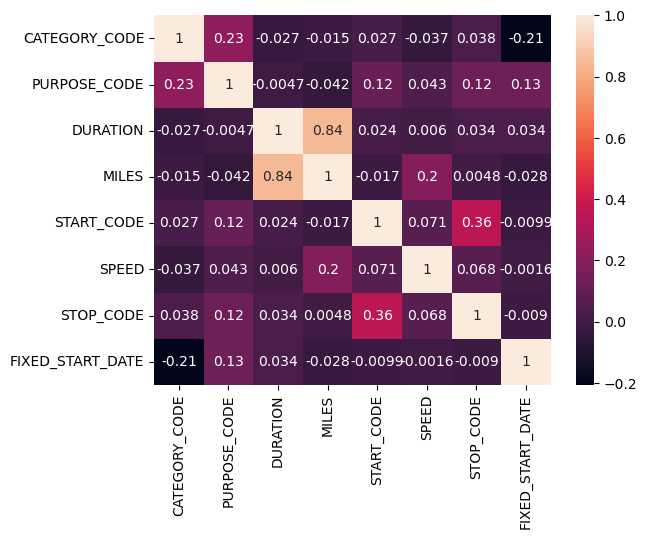

In [338]:
sns.heatmap(corr,annot = True)

In [272]:
drive_per_month = df.groupby(df['FIXED_END_DATE'].dt.to_period('M'))['CATEGORY'].count()

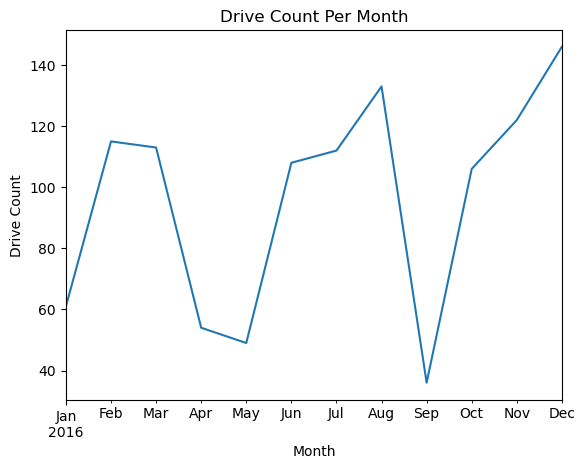

In [276]:
drive_per_month.plot(kind = 'line', title = 'Drive Count Per Month')
plt.ylabel('Drive Count')
plt.xlabel('Month')
plt.show()

In [280]:
category_count = df['CATEGORY'].value_counts()

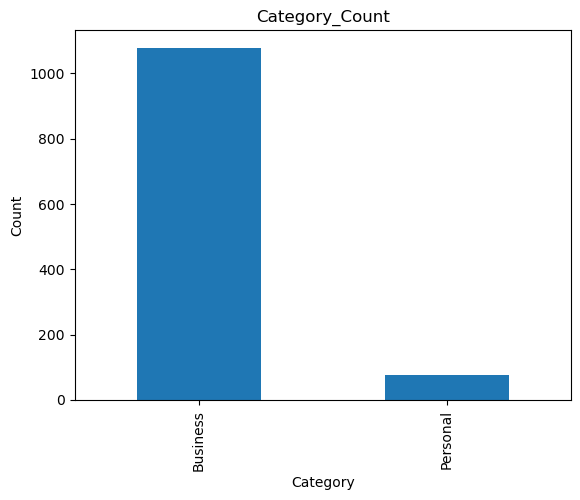

In [282]:
category_count.plot(kind = 'bar', title = 'Category_Count')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()

In [302]:
purpose_count = df.loc[df['PURPOSE'] != 'UnKnown'].groupby('PURPOSE')['CATEGORY'].count()

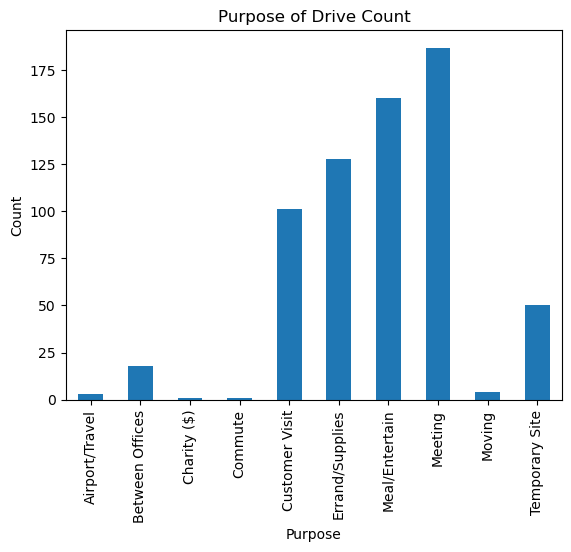

In [342]:
purpose_count.plot(kind = 'bar', title = 'Purpose of Drive Count')
plt.ylabel('Count')
plt.xlabel('Purpose')
plt.show()

In [330]:
monthly_mile_drive = df.groupby(df['FIXED_END_DATE'].dt.to_period('M')).agg({'MILES':'sum', 'PURPOSE':'count'}).rename(columns = {'MILES':'TOTAL_MILES','PURPOSE':'TOTAL_DRIVE'})

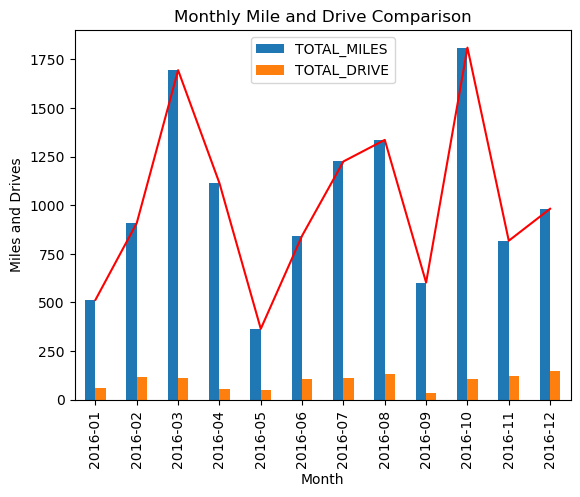

In [340]:
monthly_mile_drive.plot(kind = 'bar',title = 'Monthly Mile and Drive Comparison')
plt.plot(monthly_mile_drive['TOTAL_MILES'].values, color='red')
plt.ylabel('Miles and Drives')
plt.xlabel('Month')
plt.show()